# Tarefa: Gerador de Descrição de Imagens com VLMs

**Objetivo:** Implementar uma aplicação simples que recebe uma imagem como entrada e usa um VLM (Vision Language Model) para gerar uma descrição básica do conteúdo.

> **Conceitos-chave abordados**:
> - **VLM (Vision Language Model)**: Um modelo de IA que entende a relação entre imagens e texto.
> - **Inferência**: O processo de usar um modelo treinado para fazer previsões (gerar texto) em novos dados (imagens).
> - **Pré-processamento**: A etapa de formatação da imagem para que ela seja compatível com a entrada do modelo.

**Referências**

- [Documentação da Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Modelo BLIP (Salesforce)](https://huggingface.co/Salesforce/blip-image-captioning-base)
- [Biblioteca Pillow (PIL)](https://pillow.readthedocs.io/en/stable/)

## 📋 Fluxo do exercício

1.  **Configurar o ambiente** instalando as bibliotecas necessárias (`transformers`, `torch`, `Pillow`).
2. **Complete os trechos de código entre**
```
### =============================================
### --------> Inicie seu código aqui <-----------
### =============================================
```
e
```
### =============================================
### ----------> Fim do seu código <--------------
### =============================================
```
3. Cada seção possui **sanity checks** para verificar se a implementação está correta.
4. Você pode adicionar células extras para **experimentação**.
5.  **Testar e validar** o gerador com diferentes imagens.

## ⚙️ 1. Ambiente e Dependências

Execute a célula abaixo para instalar as bibliotecas `transformers` (para o modelo VLM), `torch` (framework de deep learning) e `Pillow` (para manipulação de imagens).

In [1]:
# Instala as dependências necessárias
!pip install -q transformers torch Pillow accelerate

# Importa as bibliotecas
import torch
from PIL import Image
import requests
import os
from transformers import AutoProcessor, LlavaForConditionalGeneration, LlavaProcessor
from IPython.display import display, HTML

# Criação de um mock de imagem para sanity checks
MOCK_IMAGE_PATH = "mock_image.jpg"
try:
    Image.new('RGB', (100, 100), color = 'red').save(MOCK_IMAGE_PATH)
except Exception as e:
    print(f"Erro ao criar mock de imagem: {e}")

print("Dependências instaladas e importadas com sucesso!")

Dependências instaladas e importadas com sucesso!


## 🖼️ 2. Gerador de Descrição de Imagens

O objetivo é criar um pipeline que carrega uma imagem, a processa com um VLM e exibe a descrição gerada.

**Sua tarefa:**
1.  **Encontrar uma URL de imagem** e definir o caminho para salvá-la.
2.  **Carregar o Modelo e o Processador** VLM (sugestão: `Salesforce/blip-image-captioning-base`).
3.  **Implementar uma função** para carregar a imagem do disco.
4.  **Implementar a lógica de geração** que usa o modelo para criar a descrição.
5.  **Exibir** a imagem e o texto gerado.

In [4]:
### =============================================
### --------> Inicie seu código aqui <-----------
### =============================================

# Utilize um link de alguma imagem .jpg ou .png
IMAGE_URL = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUukgbngHlbAQ0fVcLghmJO0fpUIFA6viA2w&s"
# Nome do arquivo que será baixado
IMAGE_PATH = "raposa"

### =============================================
### -----------> Fim do seu código <-------------
### =============================================

# Baixa a imagem se ela não existir
if not os.path.exists(IMAGE_PATH):
    try:
        print("Baixando a imagem...")
        response = requests.get(IMAGE_URL)
        response.raise_for_status()
        with open(IMAGE_PATH, 'wb') as f:
            f.write(response.content)
        print("Download completo!")
    except Exception as e:
        print(f"Erro ao baixar a imagem: {e}")

assert os.path.exists(IMAGE_PATH), f"❌ Erro: Imagem não encontrada em '{IMAGE_PATH}'"
print("✅ 1/2: Arquivo da imagem existe.")

file_size = os.path.getsize(IMAGE_PATH)
assert file_size > 1000, f"❌ Erro: O arquivo de imagem parece muito pequeno ({file_size} bytes). O download pode ter falhado."
print(f"✅ 2/2: Arquivo da imagem não está vazio (Tamanho: {file_size / 1e3:.2f} KB).")

print("✅ Sanity check (Download) aprovado!")

Baixando a imagem...
Download completo!
✅ 1/2: Arquivo da imagem existe.
✅ 2/2: Arquivo da imagem não está vazio (Tamanho: 5.61 KB).
✅ Sanity check (Download) aprovado!


In [5]:
### =============================================
### --------> Inicie seu código aqui <-----------
### =============================================
from transformers import LlavaForConditionalGeneration, LlavaProcessor
import torch

# Define o ID do modelo VLM (agora um modelo da família LLaVA)
MODEL_ID = "llava-hf/llava-1.5-7b-hf"

# Carrega o processador (agora o LlavaProcessor)
processor = LlavaProcessor.from_pretrained(MODEL_ID)

# Carrega o modelo
print("Carregando o modelo LLaVA... Isso pode levar alguns minutos e requer muita VRAM.")
model = LlavaForConditionalGeneration.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)

# Define o dispositivo (GPU é obrigatória aqui)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
### =============================================
### -----------> Fim do seu código <-------------
### =============================================

assert isinstance(processor, LlavaProcessor), f"❌ Erro: 'processor' não é um objeto do tipo LlavaProcessor."
print("✅ 1/3: Objeto 'processor' criado com sucesso.")

assert isinstance(model, LlavaForConditionalGeneration), f"❌ Erro: 'model' não é um objeto do tipo LlavaForConditionalGeneration."
print("✅ 2/3: Objeto 'model' criado com sucesso.")

print(f"✅ 3/3: Modelo movido para o dispositivo: {device}")
print("✅ Sanity check (Inicialização) aprovado!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Carregando o modelo LLaVA... Isso pode levar alguns minutos e requer muita VRAM.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

✅ 1/3: Objeto 'processor' criado com sucesso.
✅ 2/3: Objeto 'model' criado com sucesso.
✅ 3/3: Modelo movido para o dispositivo: cuda
✅ Sanity check (Inicialização) aprovado!


In [6]:
def load_image(image_path: str) -> Image.Image:
    """Carrega uma imagem do disco e a converte para RGB."""
    ### =============================================
    ### --------> Inicie seu código aqui <-----------
    ### =============================================

    try:
        # Abre a imagem usando Pillow
        image = Image.open(image_path)

        # Garante que a imagem está no formato RGB
        image = image.convert("RGB")

        return image
    except Exception as e:
        print(f"Erro ao carregar a imagem {image_path}: {e}")
        return None

    ### =============================================
    ### -----------> Fim do seu código <-------------
    ### =============================================

# --- Testando a função de carregar imagem ---
mock_img = load_image(MOCK_IMAGE_PATH)
assert isinstance(mock_img, Image.Image), "❌ Sanity Check Falhou: A função não retornou um objeto Image do Pillow."
assert mock_img.mode == "RGB", "❌ Sanity Check Falhou: A imagem não foi convertida para 'RGB'."
print("✅ Sanity check para `load_image` aprovado.")

✅ Sanity check para `load_image` aprovado.


In [7]:
def generate_description(model, processor, image: Image.Image, device: str) -> str:
    """Gera uma descrição em texto para a imagem fornecida usando LLaVA."""

    ### =============================================
    ### --------> Inicie seu código aqui <----------
    ### =============================================

    # 1. Crie o prompt. LLaVA espera um formato de chat.
    #    <image> é um token especial que o processador substituirá pela imagem.
    #    Estamos pedindo em português para testar a capacidade do modelo.
    prompt = "USER: <image>\nDescreva esta imagem em detalhes.\nASSISTANT:"

    # 2. Processa a imagem e o texto. Lembre-se de usar GPU e float16
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)

    # 3. Gera a saída (IDs de tokens)
    print("Gerando descrição detalhada...")
    output_ids = output_ids = model.generate(**inputs, max_new_tokens=200)

    # 4. Decodifica os IDs para texto. Precisamos decodificar o output *completo*
    full_text = processor.decode(output_ids[0], skip_special_tokens=True)

    # 5. Limpa a saída para retornar apenas a resposta do assistente. Queremos apenas a descrição
    assistant_prompt = "ASSISTANT:"
    assistant_index = full_text.rfind(assistant_prompt)

    if assistant_index != -1:
        description = full_text[assistant_index + len(assistant_prompt):].strip()
    else:
        # Fallback caso algo dê errado
        description = full_text

    return description

    ### =============================================
    ### -----------> Fim do seu código <------------
    ### =============================================

# --- Testando a função de geração ---\
print("Executando Sanity Check com a imagem mock...")
mock_desc = generate_description(model, processor, mock_img, device)
assert isinstance(mock_desc, str), "❌ Sanity Check Falhou: A descrição gerada não é uma string."
assert len(mock_desc) > 0, "❌ Sanity Check Falhou: A descrição está vazia."
print(f"✅ Descrição de mock gerada: '{mock_desc}'")
print("✅ Sanity check para `generate_description` aprovado.")

Executando Sanity Check com a imagem mock...
Gerando descrição detalhada...
✅ Descrição de mock gerada: 'The image is a close-up of a bright red background, which appears to be a wall or a piece of fabric. The red color is vibrant and covers the entire frame of the image. The red hue creates a striking contrast with the rest of the scene, making it the focal point of the image.'
✅ Sanity check para `generate_description` aprovado.


Iniciando o processamento da imagem: raposa
Gerando descrição detalhada...
--- Processamento Concluído ---


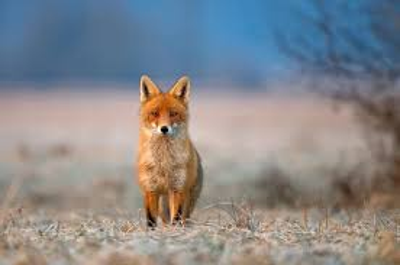

✅ Sanity check (Pipeline) aprovado!


In [8]:
def process_and_describe_image(image_path: str):
    """Função principal que orquestra o pipeline completo."""
    print(f"Iniciando o processamento da imagem: {image_path}")

    ### =============================================
    ### --------> Inicie seu código aqui <-----------
    ### =============================================

    # 1. Carrega a imagem do disco
    image = load_image(image_path)

    if image is None:
        print("Falha ao carregar a imagem. Abortando.")
        return

    # 2. Gera a descrição
    description = generate_description(model, processor, image, device)

    ### =============================================
    ### -----------> Fim do seu código <-------------
    ### =============================================

    # 3. Exibe os resultados
    print("--- Processamento Concluído ---")
    display(HTML(f"<h3>Descrição Gerada:</h3><p><b>{description}</b></p>"))
    display(image.resize((400, int(image.height * (400 / image.width)))))

    return image, description

# --- Executa o pipeline ---
img, desc = process_and_describe_image(IMAGE_PATH)

# --- Sanity check final ---
assert img is not None, "❌ Erro: A imagem final é 'None'."
assert isinstance(desc, str) and len(desc) > 0, "❌ Erro: A descrição final é inválida."
print("✅ Sanity check (Pipeline) aprovado!")

## 🧪 Resumo da Tarefa do Aluno
O objetivo é construir um pipeline completo para gerar descrições de imagens. Para isso, você deverá completar o código nos locais indicados em quatro seções principais.

Suas Tarefas:
1. **Carregar a Imagem**: No primeiro bloco de código, sua tarefa é definir as variáveis `IMAGE_URL` e `IMAGE_PATH`. Preencha a URL de uma imagem e defina o nome do arquivo local onde ela será salva.

2. **Inicializar os Componentes**: No segundo bloco, você deve inicializar os objetos essenciais para a geração:
    * Defina o `MODEL_ID` (ex: `llava-hf/llava-1.5-7b-hf`).
    * Carregue o `AutoProcessor` (e importe o LlavaProcessor para o sanity check).
    * Carregue o `LlavaForConditionalGeneration`
    * Configure o `device` (GPU é praticamente obrigatória).

3. **Implementar o Carregamento**: No terceiro bloco, você deve completar a função `load_image`. Sua tarefa é usar a biblioteca `Pillow` (PIL) para abrir a imagem e garantir que ela esteja no formato `RGB`.

4. **Implementar a Geração**: No quarto bloco, você precisa implementar a lógica principal na função `generate_description`:
    * Crie um `prompt` no formato de chat, instruindo o modelo sobre o que fazer (ex: `USER: <image>\nDescreva esta imagem em detalhes.\nASSISTANT:`).
    * Use o `processor` para converter a imagem PIL e o texto do prompt em tensores.
    * Use o `model.generate()` para criar os IDs de token da descrição.
    * Use o `processor.decode()` para converter os IDs de volta em texto e isole a resposta do assistente (o texto que vem depois de `ASSISTANT:`).

**Como Validar seu Trabalho:**

Após cada seção que você completar, execute a célula. Os `asserts` (Sanity Checks) no final de cada célula irão verificar se a implementação está correta (✅). Ao final, a execução do pipeline completo na última célula deverá exibir sua imagem e uma descrição em texto detalhada.

## 🧷 Dicas e Notas

- **Performance**: O modelo `llava-1.5-7b-hf` é extremamente poderoso, mas também muito grande (cerca de 14GB de download). A geração da descrição será lenta (pode levar de 30 a 60 segundos), o que é normal. O uso de `torch.float16` é essencial para que ele caiba na memória da GPU do Colab.
- **GPU no Colab**: Para garantir o uso de uma GPU no Google Colab, vá em `Ambiente de execução` > `Alterar o tipo de ambiente de execução` e selecione `T4 GPU` (ou similar) no menu suspenso "Acelerador de hardware".
- **Robustez e Alucinação**: Modelos grandes como o LLaVA podem "alucinar" (inventar fatos), como vimos com as bolsas. Isso é um desafio comum. A melhor forma de combater isso é com **Engenharia de Prompt**:
    * Prompt vago: `"Descreva a imagem"`(convida à alucinação).
    * Prompt melhor: `"Descreva esta imagem de forma literal e objetiva, focando apenas no que é claramente visível."` (força o modelo a ser mais factual).
- **O Poder do LLaVA (VQA)**: Com o LLaVA, estamos usando um modelo de **VQA (Visual Question Answering)**. A "descrição detalhada" que pedimos é, na verdade, apenas uma resposta a um prompt. O verdadeiro poder aqui é que você pode mudar esse prompt para fazer perguntas diretas sobre a imagem, como: `"Quantas pessoas estão na calçada?"`, `"Qual a cor do ônibus?"` ou `"O que está escrito na lateral do ônibus?"`.

##  🔅 Atividade Bônus:

#### **Selecione algum conjunto de imagens e ajuste o prompt para resolver alguma tarefa.**


Exemplo: Dado um conjunto de imagens de gato, faça um classificador de raça de cada gato

Iniciando tarefa de classificação para 3 imagens...

--- Processando imagem: gato_novo_1.jpg ---
Gerando resposta...


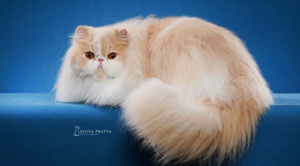


--- Processando imagem: gato_persa_novo.png ---
Gerando resposta...


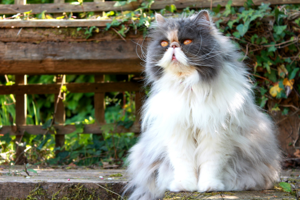


--- Processando imagem: cachorro_pug.jpg ---
Gerando resposta...


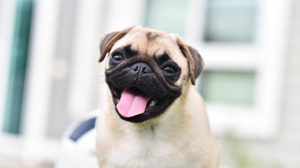


--- Tarefa Concluída ---
Resultados Finais:
{'gato_novo_1.jpg': 'The cat in this image is a long-haired Persian cat.', 'gato_persa_novo.png': 'The cat in this image is a long-haired, fluffy, and white Persian cat.', 'cachorro_pug.jpg': 'No cat detected.'}


In [20]:

import os
import urllib.request
from PIL import Image
from IPython.display import display, HTML

def download_image(url, path):
    if not os.path.exists(path):
        print(f"Baixando imagem de exemplo: {path}...")
        try:
            urllib.request.urlretrieve(url, path)
            print("Download concluído.")
        except Exception as e:
            print(f"Erro ao baixar {url}: {e}")
            return False
    return True

url_gato_siames = "https://revistapulodogato.com.br/wp-content/uploads/2025/05/Persa_Capa_Pulo_do_Gato.jpg"
url_gato_persa = "https://vetex.vet.br/blog/wp-content/uploads/2021/12/gato-persa.png"
url_cachorro = "https://conteudo.imguol.com.br/c/entretenimento/54/2020/04/28/cachorro-pug-1588098472110_v2_900x506.jpg"

path_gato_siames = "gato_novo_1.jpg"
path_gato_persa = "gato_persa_novo.png"
path_cachorro = "cachorro_pug.jpg"

download_image(url_gato_siames, path_gato_siames)
download_image(url_gato_persa, path_gato_persa)
download_image(url_cachorro, path_cachorro)

image_paths = [
    path_gato_siames,
    path_gato_persa,
    path_cachorro,
]

def generate_response_from_image(model, processor, image: Image.Image, prompt_template: str, device: str) -> str:
    """Gera uma resposta em texto para uma imagem, dado um prompt flexível."""

    prompt = prompt_template
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)

    print("Gerando resposta...")
    output_ids = model.generate(**inputs, max_new_tokens=50)

    full_text = processor.decode(output_ids[0], skip_special_tokens=True)

    assistant_prompt = "ASSISTANT:"
    assistant_index = full_text.rfind(assistant_prompt)

    if assistant_index != -1:
        response = full_text[assistant_index + len(assistant_prompt):].strip()
    else:
        response = full_text

    return response
PROMPT_CLASSIFICADOR_GATO = "USER: <image>\nWhat is the breed of the cat in this image? If there is no cat, just say 'No cat detected'.\nASSISTANT:"

print(f"Iniciando tarefa de classificação para {len(image_paths)} imagens...")

resultados_classificacao = {}

for path in image_paths:
    print(f"\n--- Processando imagem: {path} ---")

    image = load_image(path)

    if image:
        classification_result = generate_response_from_image(
            model,
            processor,
            image,
            PROMPT_CLASSIFICADOR_GATO,
            device
        )

        resultados_classificacao[path] = classification_result

        display(HTML(f"<h3>Resultado para <i>{path}</i>:</h3><p><b>{classification_result}</b></p>"))
        display(image.resize((300, int(image.height * (300 / image.width)))))
    else:
        print(f"Não foi possível carregar a imagem: {path}")

print("\n--- Tarefa Concluída ---")
print("Resultados Finais:")
print(resultados_classificacao)